# Human bone marrow

In [1]:
import scvelo as scv
import seaborn as sns
import numpy as np

In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.settings.set_figure_params('scvelo')  # for beautified visualization

## Read data

In [3]:
adata = scv.datasets.bonemarrow()
adata

AnnData object with n_obs × n_vars = 5780 × 14319
    obs: 'clusters', 'palantir_pseudotime'
    uns: 'clusters_colors'
    obsm: 'X_tsne'
    layers: 'spliced', 'unspliced'

In [4]:
scv.utils.show_proportions(adata)
adata

Abundance of ['spliced', 'unspliced']: [0.52 0.48]


AnnData object with n_obs × n_vars = 5780 × 14319
    obs: 'clusters', 'palantir_pseudotime'
    uns: 'clusters_colors'
    obsm: 'X_tsne'
    layers: 'spliced', 'unspliced'

## Gene selection by detection, high variability, normalizing every cell by its initial size and logarithmizing X

In [5]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=5000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 7837 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 5000 highly variable genes.
Logarithmized X.
computing neighbors
    finished (0:00:03) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:02) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


## Calculating RNA velocity

In [6]:
scv.tl.velocity(adata)

computing velocities
    finished (0:00:03) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [7]:
scv.tl.velocity_graph(adata)

computing velocity graph (using 1/12 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:21) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


## Plot

computing velocity embedding
    finished (0:00:01) --> added
    'velocity_tsne', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_bonemarrow_umap_stream.svg


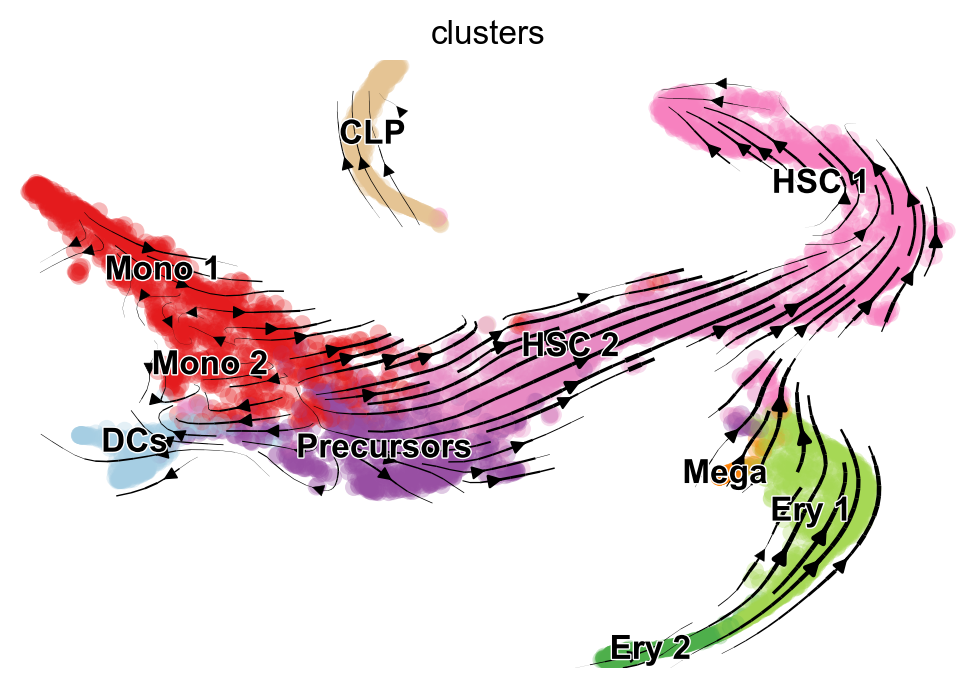

In [8]:
scv.pl.velocity_embedding_stream(adata, basis="tsne", save="bonemarrow_umap_stream.svg")

saving figure to file ./figures/scvelo_bonemarrow_umap_vector.svg


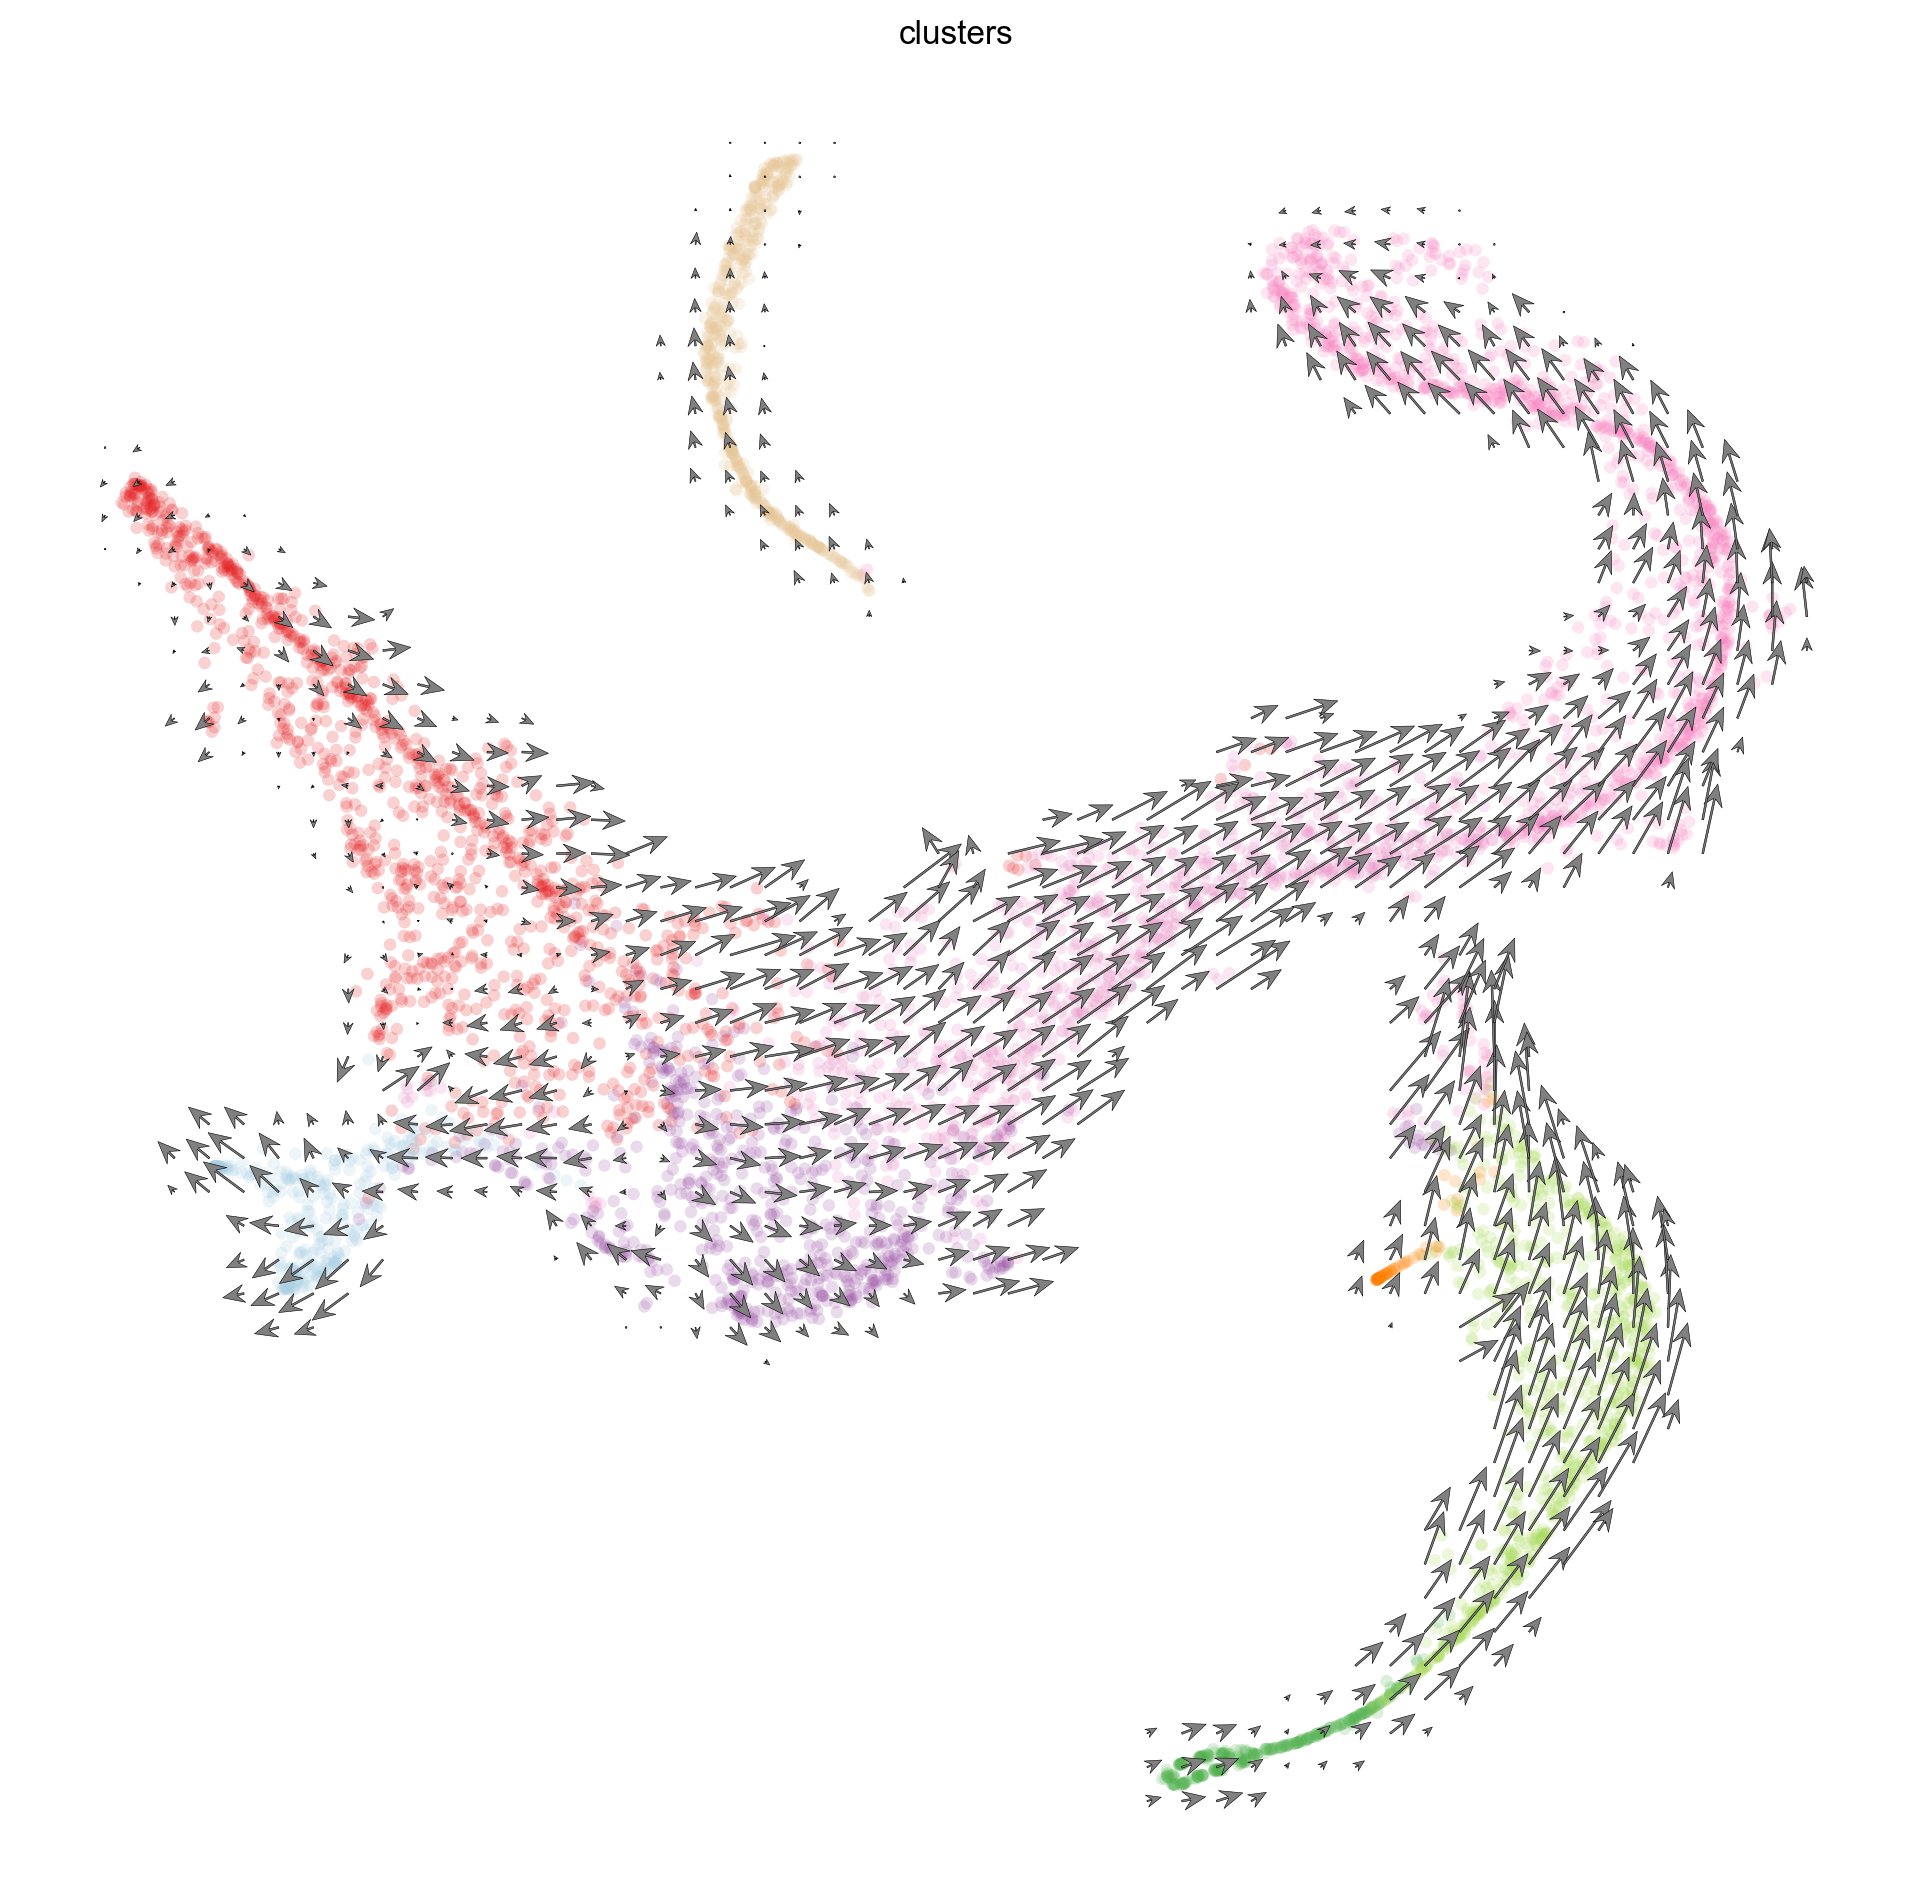

In [9]:
scv.pl.velocity_embedding_grid(adata, basis="tsne", figsize=(12, 12), arrow_size=2, arrow_length=5, save="bonemarrow_umap_vector.svg")

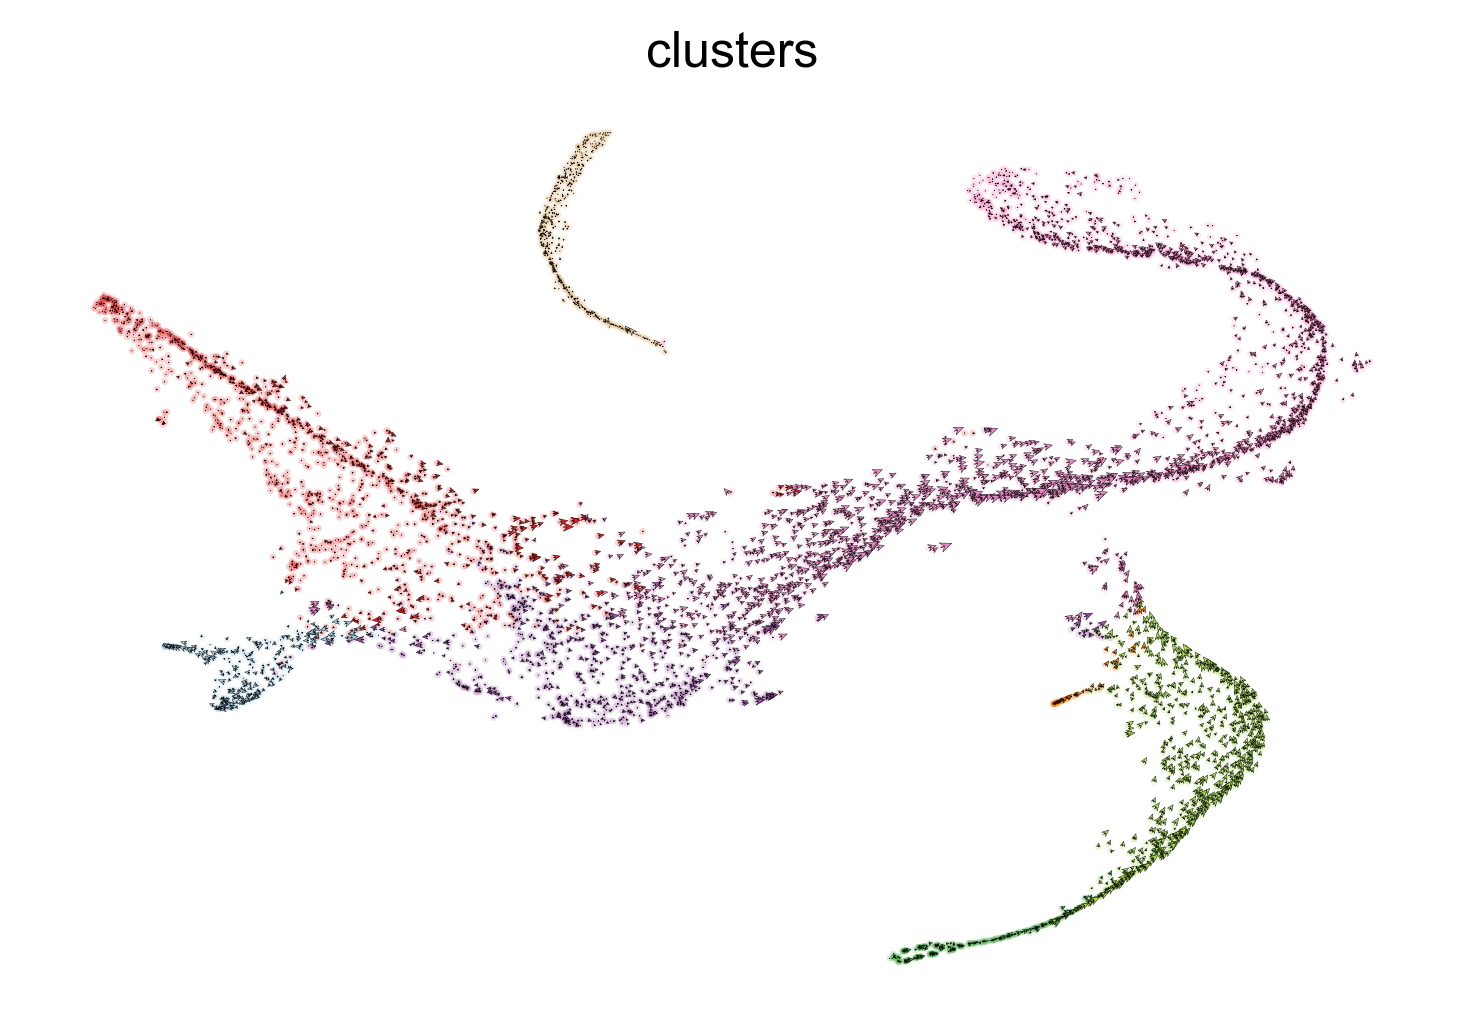

In [10]:
scv.pl.velocity_embedding(adata, basis="tsne", arrow_length=2, arrow_size=1.5, dpi=150)

## Latent time

In [11]:
scv.tl.recover_dynamics(adata)

recovering dynamics (using 1/12 cores)
    finished (0:09:24) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [12]:
scv.tl.velocity(adata, mode="dynamical")
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:04) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)
    finished (0:00:11) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [13]:
adata.layers["velocity"]

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

## Plot latent time

In [14]:
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:02) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/12 cores)
    finished (0:00:16) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [15]:
adata.layers["velocity"]

array([[-0.0347667 , -0.07790256,  0.03600142, ..., -0.03626266,
         0.08644614, -0.02229331],
       [ 0.01701961, -0.07010137, -0.04245552, ..., -0.15840447,
        -0.07218204, -0.071442  ],
       [ 0.03901071, -0.06082338, -0.01013502, ...,  0.35294652,
        -0.10879488, -0.04493439],
       ...,
       [-0.06207257,  0.05832706, -0.01450209, ...,  0.21420972,
        -0.06711146, -0.12570247],
       [-0.04124789, -0.02151145,  0.02752996, ...,  0.17706531,
         0.07011361,  0.02148031],
       [ 0.00258293, -0.03051785,  0.00791777, ...,  0.11377907,
        -0.14231497, -0.03077451]], dtype=float32)

computing terminal states
    identified 2 regions of root cells and 2 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/scvelo_bonemarrow_latent_time.svg


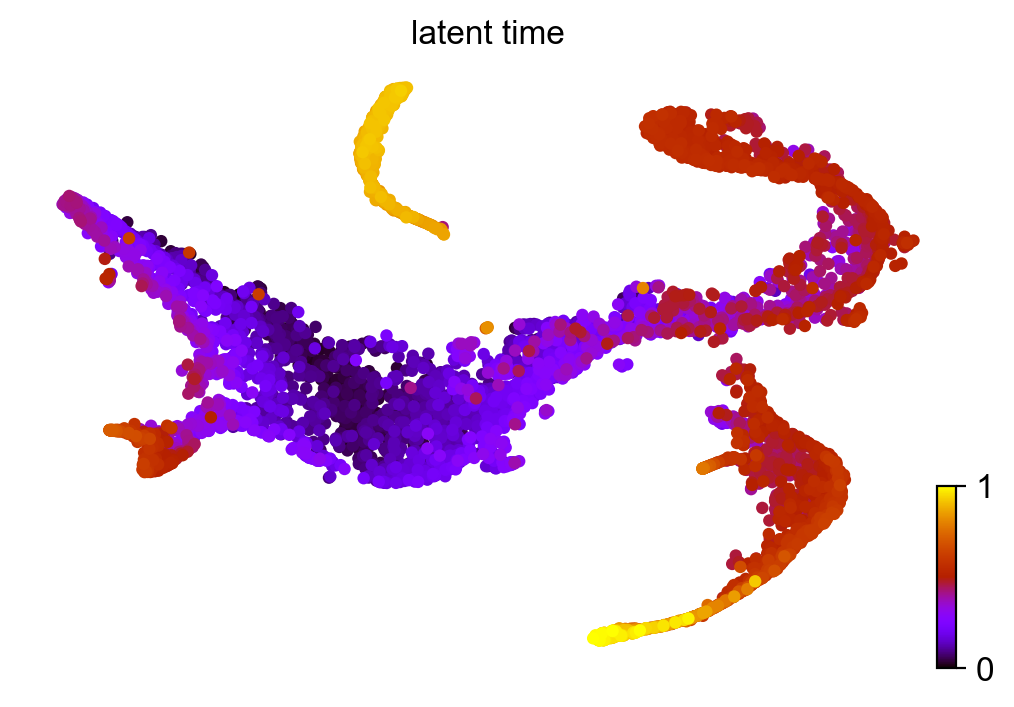

In [16]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80, colorbar=True, save="bonemarrow_latent_time.svg")

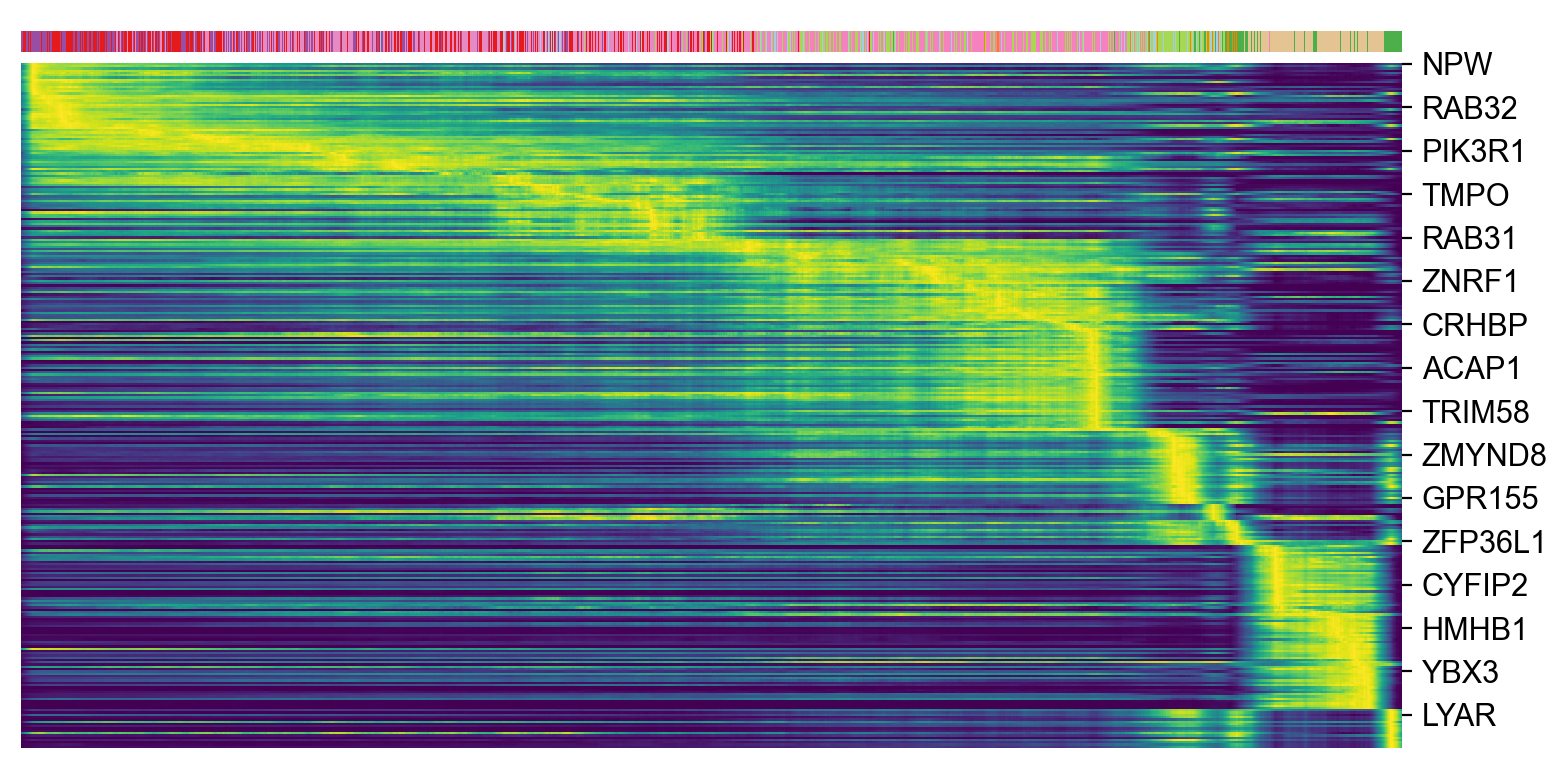

In [17]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, tkey='latent_time', n_convolve=100, col_color='clusters')

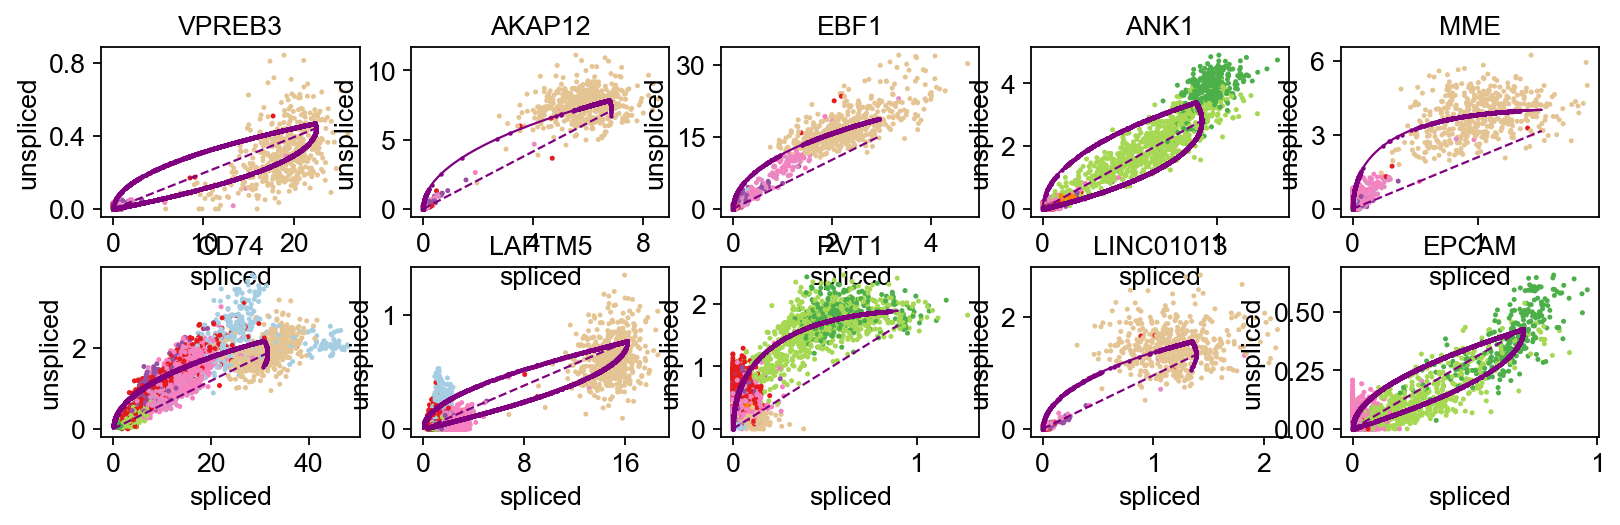

In [18]:
scv.pl.scatter(adata, basis=top_genes[:10], ncols=5)

## Fetch data

In [19]:
adata

AnnData object with n_obs × n_vars = 5780 × 5000
    obs: 'clusters', 'palantir_pseudotime', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time'
    var: 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'fit_r2'
    uns: 'clusters_colors', 'pca', 'neighbors', 'velocity_params', 'velocity_graph', 'velocity_graph_neg', 'recover_dynamics'
    obsm: 'X_tsne', 'X_pca', 'velocity_tsne'
    varm: 'PCs', 'loss'
    layers: 'spliced', 'unspliced', 'Ms', 'Mu', 'velocity', 'variance_velocity', 'fit_t', 'fit_tau', 'fit_tau_', 'velocity_u'
    obsp: 'distances',

In [20]:
adata.X

<5780x5000 sparse matrix of type '<class 'numpy.float32'>'
	with 4717758 stored elements in Compressed Sparse Row format>

In [21]:
adata.obs[["clusters", "root_cells", "end_points", "latent_time"]].to_csv("../../results/bonemarrow/obs.tsv", sep="\t")

In [22]:
adata.var[["fit_alpha", "fit_beta", "fit_gamma", "fit_t_", "fit_likelihood", "fit_u0", "fit_s0"]].to_csv("../../results/bonemarrow/genes.tsv", sep="\t")

In [23]:
adata.varm['loss']

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [24]:
adata.varm['loss'].shape

(5000, 22)

In [25]:
adata.layers["velocity"]

array([[-0.0347667 , -0.07790256,  0.03600142, ..., -0.03626266,
         0.08644614, -0.02229331],
       [ 0.01701961, -0.07010137, -0.04245552, ..., -0.15840447,
        -0.07218204, -0.071442  ],
       [ 0.03901071, -0.06082338, -0.01013502, ...,  0.35294652,
        -0.10879488, -0.04493439],
       ...,
       [-0.06207257,  0.05832706, -0.01450209, ...,  0.21420972,
        -0.06711146, -0.12570247],
       [-0.04124789, -0.02151145,  0.02752996, ...,  0.17706531,
         0.07011361,  0.02148031],
       [ 0.00258293, -0.03051785,  0.00791777, ...,  0.11377907,
        -0.14231497, -0.03077451]], dtype=float32)

In [26]:
adata.layers["variance_velocity"]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [27]:
adata.layers["Ms"]

array([[0.42706034, 0.35099453, 0.08059337, ..., 0.16168332, 0.2984044 ,
        1.2734667 ],
       [0.10843629, 0.3158458 , 0.18074001, ..., 0.21793522, 0.4105208 ,
        0.9668976 ],
       [0.12349105, 0.2740433 , 0.04314643, ..., 0.03768719, 0.34156543,
        0.31681558],
       ...,
       [0.3385206 , 0.3657682 , 0.06173772, ..., 0.01843184, 0.30283025,
        1.1379579 ],
       [0.4678412 , 0.1504542 , 0.14531803, ..., 0.03933197, 0.1816118 ,
        0.91453743],
       [0.20903268, 0.38270402, 0.16676787, ..., 0.08931182, 0.37622413,
        0.6671795 ]], dtype=float32)

In [28]:
import pandas as pd

In [29]:
pd.DataFrame(adata.layers["velocity"], columns=adata.var.index, index=adata.obs.index).to_csv("../../results/bonemarrow/velocity.tsv", sep="\t")

In [30]:
pd.DataFrame(adata.layers["variance_velocity"], columns=adata.var.index, index=adata.obs.index).to_csv("../../results/bonemarrow/variance_velocity.tsv", sep="\t")

In [31]:
pd.DataFrame(adata.layers["unspliced"].toarray(), columns=adata.var.index, index=adata.obs.index).to_csv("../../results/bonemarrow/unspliced.tsv", sep="\t")

In [32]:
adata.layers["unspliced"]

<5780x5000 sparse matrix of type '<class 'numpy.float32'>'
	with 5011937 stored elements in Compressed Sparse Row format>

In [33]:
pd.DataFrame(adata.layers["spliced"].toarray(), columns=adata.var.index, index=adata.obs.index).to_csv("../../results/bonemarrow/spliced.tsv", sep="\t")

In [34]:
pd.DataFrame(adata.X.toarray(), columns=adata.var.index, index=adata.obs.index).to_csv("../../results/bonemarrow/gene_expr.tsv", sep="\t")

In [35]:
pd.DataFrame(adata.layers["velocity_u"], columns=adata.var.index, index=adata.obs.index).to_csv("../../results/bonemarrow/velocity_u.tsv", sep="\t")

In [36]:
pd.DataFrame(adata.layers["Mu"], columns=adata.var.index, index=adata.obs.index).to_csv("../../results/bonemarrow/Mu.tsv", sep="\t")

In [37]:
pd.DataFrame(adata.layers["Ms"], columns=adata.var.index, index=adata.obs.index).to_csv("../../results/bonemarrow/Ms.tsv", sep="\t")